In [3]:
# For Data manipulation and analytics
import pandas as pd
import numpy as np

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For model training
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# setting display options for better viewing
pd.set_option('display.max_columns', None)


In [4]:
# Load the training data
df = pd.read_csv('train.csv')

print("First 5 rows of the dataset")
display(df.head())

print("\nInformation of Dataset:")
df.info()

First 5 rows of the dataset


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000



Information of Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-nul

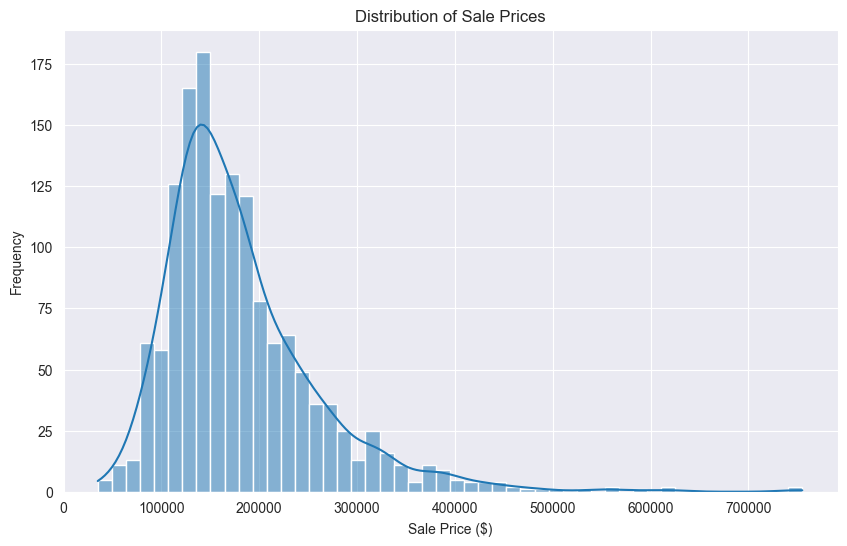

In [11]:
# Plot the distribution of SalePrice
plt.figure(figsize = (10,6))
sns.histplot(df['SalePrice'], kde=True, bins=50)
plt.title('Distribution of Sale Prices')
plt.xlabel('Sale Price ($)')
plt.ylabel('Frequency')
plt.show()

In [10]:
transformed_data = np.log1p(df['SalePrice'])

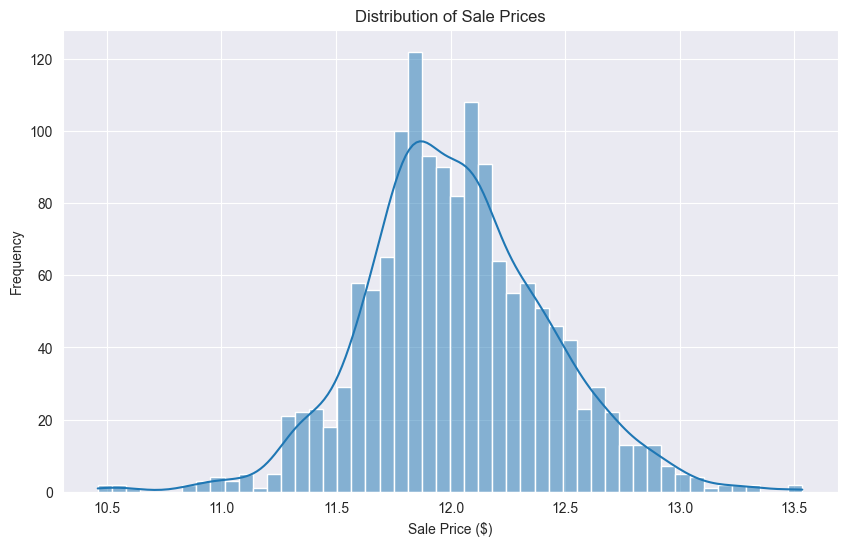

In [13]:
# Plot the distribution of transformed SalePrice as it was skewed
plt.figure(figsize = (10,6))
sns.histplot(transformed_data, kde=True, bins=50)
plt.title('Distribution of Sale Prices')
plt.xlabel('Sale Price ($)')
plt.ylabel('Frequency')
plt.show()

In [14]:
df['SalePrice'] = transformed_data

In [15]:
# Find the percentage of missing values for each column
missing_percentage = df.isnull().sum() / len(df) * 100
missing_info = missing_percentage[missing_percentage > 0].sort_values(ascending=False)
print("Columns with missing values (%):")
print(missing_info)

Columns with missing values (%):
PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
MasVnrType      59.726027
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
Electrical       0.068493
dtype: float64


In [16]:
df= df.drop(columns=['PoolQC', 'MiscFeature', 'Alley', 'Fence'])

In [18]:
# List of categorical columns where NA means 'None'
categorical_cols_none = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'MasVnrType']

for cols in categorical_cols_none:
    df[cols] = df[cols].fillna('None')

numerical_cols_median = ['LotFrontage', 'GarageYrBlt', 'MasVnrArea']
for cols in numerical_cols_median:
    df[cols] = df[cols].fillna(df[cols].median())


In [19]:
df.dropna(inplace=True)

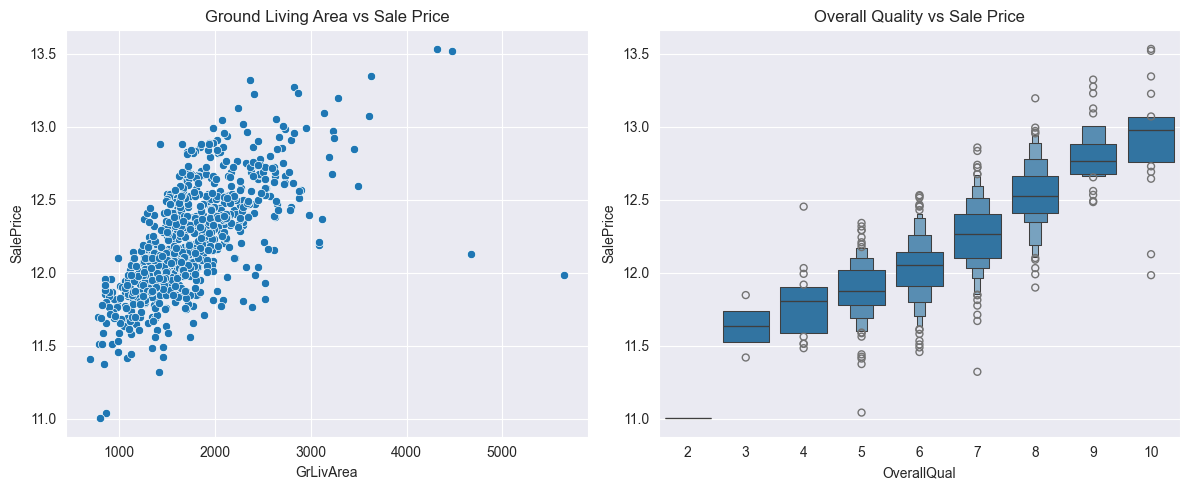

In [20]:
# Exploring Feature Relationship
plt.figure(figsize = (12,5))

# Scatter Plot for Ground Living Area vs Sale Price
plt.subplot(1,2,1)
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df)
plt.title('Ground Living Area vs Sale Price')

# Box plot for overall quality vs Sale Price
plt.subplot(1,2,2)
sns.boxenplot(x='OverallQual', y='SalePrice', data=df)
plt.title('Overall Quality vs Sale Price')

plt.tight_layout()
plt.show()



In [21]:
features = [
    'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF',
    'Neighborhood', 'BldgType'
]
target = 'SalePrice'

X = df[features]
y = df[target]

In [22]:
X = pd.get_dummies(X, columns=['Neighborhood', 'BldgType'], drop_first=True)

print("Shape of our feature matrix after one-hot encoding:")
print(X.shape)
display(X.head())

Shape of our feature matrix after one-hot encoding:
(770, 32)


,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE
1,6,1262,2,1262,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
2,7,1786,2,920,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,7,1717,3,756,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,8,2198,3,1145,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
6,8,1694,2,1686,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False


In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")

Training set size: 616 samples
Test set size: 154 samples


In [25]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [27]:
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [56]:
# Predictions from Linear Regression
lr_predictions = lr_model.predict(X_test)

# Predictions from Decision Tree
dt_predictions = dt_model.predict(X_test)

In [57]:
def evaluate_model(y_true, y_pred, model_name):
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)

    print(f"--- {model_name} Evaluation ---")
    print(f"R-squared (R²): {r2:.4f}")
    print(f"Mean Absolute Error (MAE): ${mae:,.2f}")
    print(f"Root Mean Squared Error (RMSE): ${rmse:,.2f}\n")



In [58]:
evaluate_model(y_test, lr_predictions, "Linear Regression")
evaluate_model(y_test, dt_predictions, "Decision Tree Regressor")

--- Linear Regression Evaluation ---
R-squared (R²): 0.8175
Mean Absolute Error (MAE): $0.11
Root Mean Squared Error (RMSE): $0.15

--- Decision Tree Regressor Evaluation ---
R-squared (R²): 0.7173
Mean Absolute Error (MAE): $0.15
Root Mean Squared Error (RMSE): $0.19



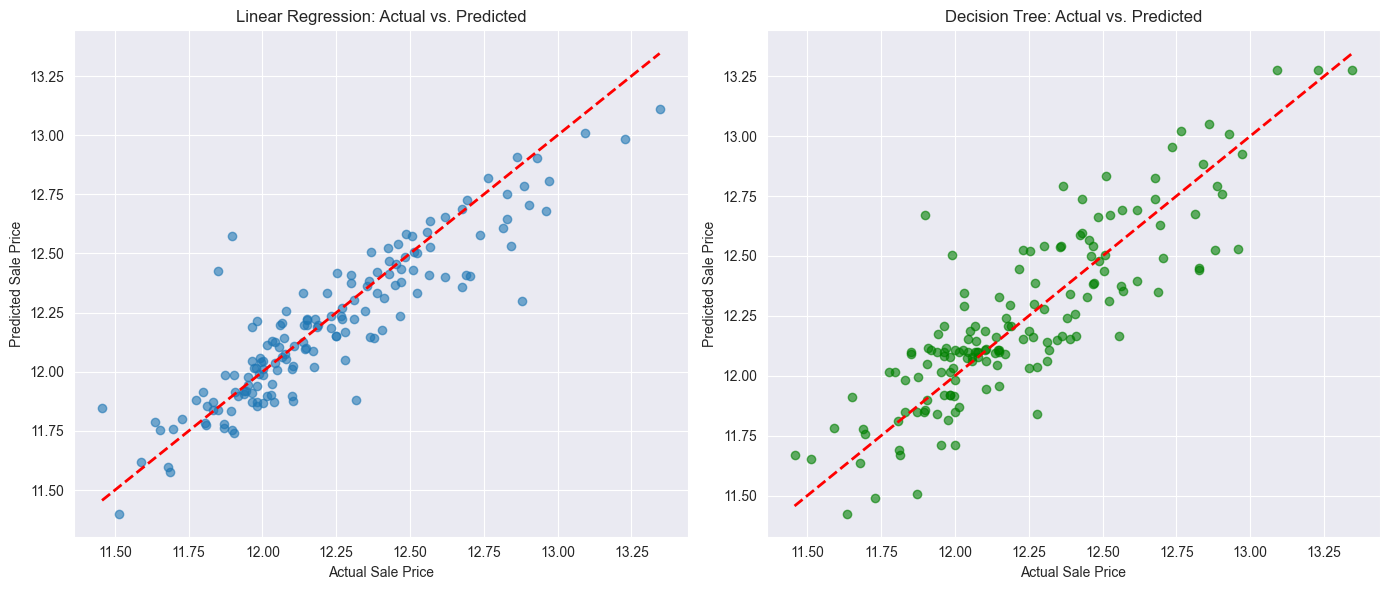

In [31]:
plt.figure(figsize=(14, 6))

# Linear Regression Results
plt.subplot(1, 2, 1)
plt.scatter(y_test, lr_predictions, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.title('Linear Regression: Actual vs. Predicted')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')

# Decision Tree Results
plt.subplot(1, 2, 2)
plt.scatter(y_test, dt_predictions, alpha=0.6, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.title('Decision Tree: Actual vs. Predicted')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')

plt.tight_layout()
plt.show()